CO4: Apply Principal Component Analysis (PCA) to reduce dimensionality on real-world datasets belonging to health/finance   6 Hours   

1. Dimensionality reduction techniques
2. Principal Component Analysis (PCA)


#### Feature Selection  
Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.  
Improves Accuracy: Less misleading data means modeling accuracy improves.  
Reduces Training Time: Less data means that algorithms train faster.  

#### Popular feature reduction techniques   
- **Principal Component Analysis (PCA)** for reducing the dimensionality of high-dimensional data while preserving most of the important information.    
- **Linear Discriminant Analysis (LDA)** for classification problems with many features but only a few samples.    
- **t-Distributed Stochastic Neighbor Embedding (t-SNE)** for visualizing complex patterns in high-dimensional data.     
- **Independent Component Analysis (ICA)** for extracting meaningful features from complex signals, such as images and audio.   
- **Non-negative Matrix Factorization (NMF)** for decomposing a non-negative matrix into two low-rank non-negative matrices.

Use with caution, as they can sometimes lead to loss of information or introduce bias into the model. Evaluate the performance of a model after applying a feature reduction technique and compare it with the performance of the original model. 

##### Pre-processing   
1. Add attributes to your data   
- <u>Dummy Attributes</u>: Categorical attributes can be converted into n-binary attributes, where n is the number of categories (or levels) that the attribute has.  
- <u>Transformed Attribute</u>: A transformed variation of an attribute can be added to the dataset in order to allow a linear method to exploit possible linear and non-linear relationships between attributes. Simple transforms like log, square and square root can be used.  
- <u>Missing Data</u>: Attributes with missing data can have that missing data imputed using a reliable method, such as k-nearest neighbors.   

2. Remove attributes from your data.   

- Project into lower dimensional spaces, but still characterize the inherent relationships in the data. PCA.   
- Changed into a higher dimension, we may identify outliers more easily.   
- Pairwise attributes with high correlation can be identified and the most correlated attributes can be removed from the data.  
    [Variance Threshold](https://scikit-learn.org/stable/modules/feature_selection.html)
        
3. Transform attributes in your data.  
- <u>Centering</u>: Transform the data so that it has a mean of zero and a standard deviation of one. This is typically called data standardization.    
- <u>Scaling</u>: A standard scaling transformation is to map the data from the original scale to a scale between zero and one. This is typically called data normalization.  
- <u>Remove Skew</u>: Skewed data is data that has a distribution that is pushed to one side or the other (larger or smaller values) rather than being normally distributed. Some methods assume normally distributed data and can perform better if the skew is removed. Try replacing the attribute with the log, square root or inverse of the values.  
- <u>Box-Cox</u>: A Box-Cox transform or family of transforms can be used to reliably adjust data to remove skew.  
- <u>Binning</u>: Numeric data can be made discrete by grouping values into bins. This is typically called data discretization. This process can be performed manually, although is more reliable if performed systematically and automatically using a heuristic that makes sense in the domain.  

##### Variance Threshold Example   

In [3]:

X = [[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]
sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
print(f"Original Data\n{X}\n")
print("After applying variance threshold")
sel.fit_transform(X)

Original Data
[[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]]

After applying variance threshold


array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

#### Task   
Take student data with age, height, weight, shoulder, waist, shoe size, and collar size.   
Apply various variance threshold and see what columns are excluded.  

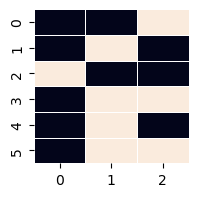

Original Data
[[0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 1]
 [0 1 0]
 [0 1 1]]

After applying variance threshold


array([[0, 1],
       [1, 0],
       [0, 0],
       [1, 1],
       [1, 0],
       [1, 1]])

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.feature_selection import VarianceThreshold

plt.figure(figsize=(2,2))
X = np.array([[0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [0, 1, 0], [0, 1, 1]])

ax = sns.heatmap(X, linewidth=0.5, cbar=False)
plt.show()

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
print(f"Original Data\n{X}\n")
print("After applying variance threshold")
sel.fit_transform(X)

#### Principal Component Analysis   
The most popular techniques to reduce the dimension of input data.  

As dimension increases, many interesting and counterintuitive phenomena arise. The “**Curse of Dimensionality**” is a term invented by mathematician Richard Bellman that refers to all these surprising effects.  

- The number of input variables or features for a dataset is referred to as its dimensionality.
- Dimensionality reduction refers to techniques that reduce the number of input variables in a dataset.
- More input features often make a predictive modeling task more challenging to model, more generally referred to as the curse of dimensionality.
- Reduction in dimension simplify a classification or regression dataset in order to better fit a predictive model.

1. Large numbers of input features can cause poor performance for machine learning algorithms.  
2. Dimensionality reduction is a general field of study concerned with reducing the number of input features.  
3. Dimensionality reduction methods include feature selection, linear algebra methods, projection methods, and autoencoders.    
4. Dimensionality reduction is performed on data prior to modeling. It might be performed after data cleaning and data scaling and before training a predictive model.


<u>Feature projection</u> - retain the features that represents the **essence** of the data.  
Any new data that is fed to the model in the future when making predictions,  
such as test dataset and new datasets, must also be projected using the same technique.   

#### Manually Calculate Principal Component Analysis   
A is a  n X m matrix    
```
   [a11, a12
    a21, a22
    a31, a32]
```   
Calculate the mean value of each column   
```
   M(m11, m12) = [(a11 + a21 + a31)/3, 
                  (a12 + a22 + a32)/3]
```
Center the values in each column by subtracting the mean column value   
```
   C = A - M
```  
Calculate the covariance matrix of the centered matrix C. 
```
   V = cov(C)
```   
calculate the eigen-decomposition of the covariance matrix V. This results in a list of eigenvalues and a list of eigenvectors.
```
   values, vectors = eig(v)
```
If all eigen-values have a similar value, then the existing representation may already be reasonably compressed 
and the projection may offer little.  
If there are eigenvalues close to zero, they represent components or axes of B that may be discarded.   
```
   B = select(values, vectors)
```

[Refer](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) for cross validation.     
[Refer](https://www.mathsisfun.com/algebra/eigenvalue.html) for eigen vector and eigen value.   

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set()

from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

In [5]:
# define a matrix
A = array([[1, 2], [3, 4], [5, 6]])
print(f'{A = }\n')

# calculate the mean of each column
M = mean(A.T, axis=1)
print(f'mean of A,\n {M = }\n')

# center columns by subtracting column means
C = A - M
print(f" cemtered columns\n {C = }\n")

# calculate covar iance matrix of centered matrix
V = cov(C.T)
print(f"covariance\n {V = }\n")

# eigendecomposition of covariance matrix
values, vectors = eig(V)
print(f" eigendecomposition\n {vectors = }\n")
print(f" eigendecomposition\n {values = }\n")

# project data
P = vectors.T.dot(C.T)
print(f"project data \n{P.T} ")

A = array([[1, 2],
       [3, 4],
       [5, 6]])

mean of A,
 M = array([3., 4.])

 cemtered columns
 C = array([[-2., -2.],
       [ 0.,  0.],
       [ 2.,  2.]])

covariance
 V = array([[4., 4.],
       [4., 4.]])

 eigendecomposition
 vectors = array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

 eigendecomposition
 values = array([8., 0.])

project data 
[[-2.82842712  0.        ]
 [ 0.          0.        ]
 [ 2.82842712  0.        ]] 


PCA is a **unsupervised linear** dimensionality reduction technique and won't work with non-linear data.   
KernelPCA (or the kernel trick) precisely addresses this limitation of PCA. 
- Project the data to another high-dimensional space using a kernel function, where the data becomes linearly representable. Sklearn provides a KernelPCA wrapper, supporting many popularly used kernel functions.
- Apply the standard PCA algorithm to the transformed data.  

In [ ]:
df = pd.read_excel('../Data/BSc23_Student_Data.xlsx')
df = df.dropna()
A_ = df[['Height_cm', 'Weight_Kg', 'Shoe_Size', 'Shoulder_cm',
       'Waist_cm']].values
A_

In [8]:
M_ = mean(A_.T, axis=1)
C_ = A_ - M_
V_ = cov(C_.T)
values_, vectors_ = eig(V_)
print(f" eigendecomposition\n {vectors_ = }\n  {values_}\n")

 eigendecomposition
 vectors_ = array([[-2.33596832e-01, -7.55089807e-01, -5.99357896e-01,
        -9.57287360e-02,  8.29338628e-02],
       [-8.29308914e-01,  4.22026673e-01, -2.41098292e-01,
        -3.28256966e-02, -2.73741301e-01],
       [-4.42071628e-02, -6.33452086e-02, -6.53349146e-02,
         9.94543520e-01, -2.54489218e-02],
       [-2.03961083e-01,  1.98281803e-01, -4.18695358e-02,
         2.53120371e-02,  9.57439526e-01],
       [-4.62736263e-01, -4.56513507e-01,  7.59355001e-01,
         9.85344189e-04,  2.91475669e-02]])
  [484.71745025 108.13893791  98.35166881   0.97245863  35.15082689]



In [16]:
print(f" eigendecomposition\n {values_ = }\n")

 eigendecomposition
 values_ = array([484.71745025, 108.13893791,  98.35166881,   0.97245863,
        35.15082689])



In [ ]:
P_ = vectors_.T.dot(C_.T)

print(f"project data \n{P_.T} ")

In [10]:
from sklearn.decomposition import PCA


In [11]:
pca = PCA(n_components=5)
pca.fit(A_)

PCA(n_components=5)

In [12]:
print(pca.components_)

[[ 2.33596832e-01  8.29308914e-01  4.42071628e-02  2.03961083e-01
   4.62736263e-01]
 [-7.55089807e-01  4.22026673e-01 -6.33452086e-02  1.98281803e-01
  -4.56513507e-01]
 [ 5.99357896e-01  2.41098292e-01  6.53349146e-02  4.18695358e-02
  -7.59355001e-01]
 [ 8.29338628e-02 -2.73741301e-01 -2.54489218e-02  9.57439526e-01
   2.91475669e-02]
 [ 9.57287360e-02  3.28256966e-02 -9.94543520e-01 -2.53120371e-02
  -9.85344189e-04]]


#### Variance Explained   
_Variance explained_ refers to the proportion of the dataset's total variation attributed to each principal component.   
In PCA, components are ordered by the amount of variance they explain, from the greatest to the least.   

_variance_ in _Variance Explained_ refers to how much the data spreads out around the mean,  
and the “explained” part refers to how much of this spread is captured by each principal component.  
The first principal component is aligned with the greatest variance, and captures the most spread of the data.  
The second principal component captures the most variance while being orthogonal to the first, and so on for subsequent components.  



In [43]:
print(pca.explained_variance_)

[484.71745025 108.13893791  98.35166881  35.15082689   0.97245863]


PC1 = ϕ11 X1 + ϕ21 X2 + … + ϕp1 Xp   
PC1: The first principal component.  
X1, X2, …, Xp: The original features of the dataset.  
ϕ11, ϕ21, …, ϕp1: The weights assigned to each original feature for the first principal component.  



[Case for Feature Reduction](https://survey.stackoverflow.co/2023/)   
##### Stack Overflow Developer Survey.     
"In May 2023 over 90,000 developers responded to our annual survey about    
how they learn and level up,   
which tools they're using,   
and which ones they want."   

#### Data Preparation for ML
1. Data Cleaning to delete duplicate rows are redundant columns
2. Outlier Detection and removal
3. Missing Value identification and imputation
4. Feature Selection with statistics and models
5. Feature Importance with models
6. Data Transforms to change data scales, types, and distributions
7. Dimensionality Reduction to create low-dimensional projections
